In [1]:
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print('Notebook run using keras:', keras.__version__)

Using TensorFlow backend.


Notebook run using keras: 2.0.4


In [2]:
inet_model = inc_net.InceptionV3()

In [3]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

('n04509417', 'unicycle', 0.99357033)
('n02105056', 'groenendael', 0.00025536775)
('n02096177', 'cairn', 7.9368583e-05)
('n02840245', 'binder', 6.7445057e-05)
('n02105251', 'briard', 5.0415209e-05)


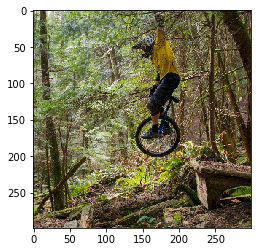

In [5]:
images = transform_img_fn(["kremsater.png"])
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

In [6]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image


In [7]:
explainer = lime_image.LimeImageExplainer()

In [8]:
%%time
# Hide color is the color for a superpixel turned OFF. 
# Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
# Here, we set it to 0 (in the representation used by inception model, 0 means gray)
explanation = explainer.explain_instance(images[0], inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)

CPU times: user 32min 3s, sys: 1min 20s, total: 33min 24s
Wall time: 9min 23s


In [11]:
from skimage.segmentation import mark_boundaries

In [16]:
explanation.local_exp

{192: [(17, 1.6721893251880826e-05),
  (27, -1.4493532487882879e-05),
  (2, -1.3713937774530439e-05),
  (13, -1.3690948651954479e-05),
  (22, 1.2862317384062055e-05),
  (28, -1.0619330804708048e-05),
  (15, -1.0058614907961285e-05),
  (4, 1.0033867011180441e-05),
  (33, -9.6320578779795598e-06),
  (14, -9.0475356364393165e-06),
  (25, 8.5297176971935783e-06),
  (32, -7.5927593306272135e-06),
  (37, 7.5459163351606624e-06),
  (5, -7.0791953962754286e-06),
  (26, -6.7754199252258212e-06),
  (62, 6.3471096714222313e-06),
  (31, 6.3238953760710414e-06),
  (44, -6.3234250431170707e-06),
  (29, 6.3126003270927293e-06),
  (16, 6.2792993735709785e-06),
  (8, -6.1929662814987989e-06),
  (34, -5.5241430356227468e-06),
  (9, 4.8959374638679581e-06),
  (50, -4.3291180556699079e-06),
  (57, -4.2528874705471223e-06),
  (46, 4.1469934140644883e-06),
  (36, -3.7626191969594304e-06),
  (1, 3.7618811301534086e-06),
  (38, 3.707611456724291e-06),
  (19, 3.1352006354907772e-06),
  (54, -2.9639529616872608

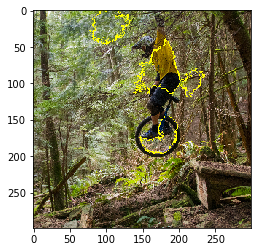

In [17]:
temp, mask = explanation.get_image_and_mask(192, positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

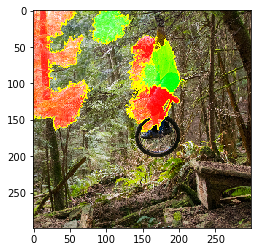

In [18]:
temp, mask = explanation.get_image_and_mask(192, positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


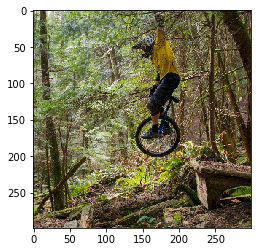

In [19]:
temp, mask = explanation.get_image_and_mask(192, positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))


In [ ]:
# tbd try other classes